###Libraries

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem.porter import PorterStemmer as PS
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#Data

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Email_spam_dataset/spam.csv', encoding = "ISO-8859-1", engine = "python") ## email spam dataset from kaggle
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
print("shape of the dataset is",df.shape)
counts = df['v1'].value_counts()
print(counts)
df['v1'].replace('ham', 0, inplace=True)
df['v1'].replace('spam', 1, inplace=True)
df.rename(columns={'v1': 'label','v2':'txt'}, inplace=True)

shape of the dataset is (5572, 5)
ham     4825
spam     747
Name: v1, dtype: int64


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   label       5572 non-null   int64 
 1   txt         5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: int64(1), object(4)
memory usage: 217.8+ KB


##Dropping unnecessary data

In [5]:
column=[]# storing column names
for i in df:
  column.append(i)
#as last three are filled with null values mostly i will be dropping them
for i in range(2,5):
  df.drop(columns=column[i], inplace=True)
df.head()

,label,txt
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.isnull().sum()

label    0
txt      0
dtype: int64

In [7]:
df.duplicated().sum()

403

In [8]:
df.drop_duplicates(keep='first')

,label,txt
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


##Adding new features such as characters, words etc

In [9]:
df['length']=df['txt'].apply(len)

In [10]:
df['num_word']=df['txt'].apply(lambda x: len(nltk.word_tokenize(x)))

In [11]:
df['num_sent']=df['txt'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [12]:
df[['num_sent','length','num_word']].describe()

,num_sent,length,num_word
count,5572.000000,5572.000000,5572.000000
mean,1.996411,80.118808,18.699390
std,1.520159,59.690841,13.741932
min,1.000000,2.000000,1.000000
25%,1.000000,36.000000,9.000000
50%,1.500000,61.000000,15.000000
75%,2.000000,121.000000,27.000000
max,38.000000,910.000000,220.000000


In [13]:
df[df['label']==0][['num_sent','length','num_word']].describe()

,num_sent,length,num_word
count,4825.000000,4825.000000,4825.000000
mean,1.837720,71.023627,17.276269
std,1.454388,58.016023,13.988585
min,1.000000,2.000000,1.000000
25%,1.000000,33.000000,8.000000
50%,1.000000,52.000000,13.000000
75%,2.000000,92.000000,22.000000
max,38.000000,910.000000,220.000000


In [14]:
df[df['label']==0][['num_sent','length','num_word']].describe()

,num_sent,length,num_word
count,4825.000000,4825.000000,4825.000000
mean,1.837720,71.023627,17.276269
std,1.454388,58.016023,13.988585
min,1.000000,2.000000,1.000000
25%,1.000000,33.000000,8.000000
50%,1.000000,52.000000,13.000000
75%,2.000000,92.000000,22.000000
max,38.000000,910.000000,220.000000


In [15]:
df.head()

,label,txt,length,num_word,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


#EDA

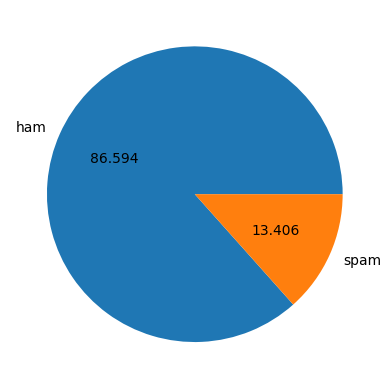

In [16]:
plt.pie(df['label'].value_counts(),labels=['ham','spam'],autopct='%0.3f')
plt.show()

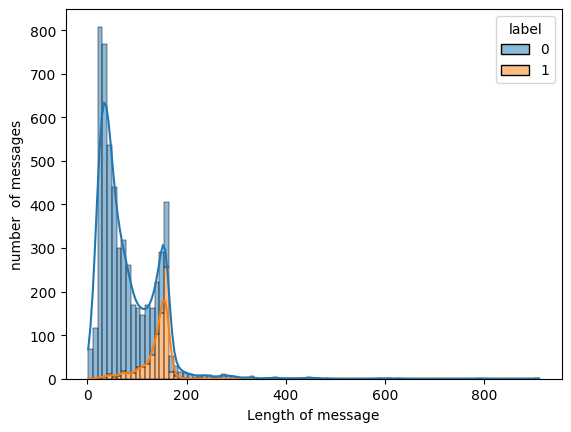

In [17]:
sns.histplot(data=df,x="length", hue="label",kde=True,multiple='stack')
plt.xlabel('Length of message')
plt.ylabel('number  of messages')
plt.show()

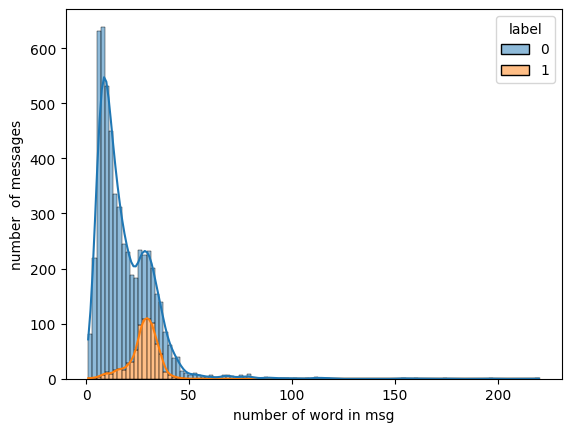

In [18]:
sns.histplot(data=df,x="num_word", hue="label",kde=True,multiple='stack')
plt.xlabel('number of word in msg')
plt.ylabel('number  of messages')
plt.show()

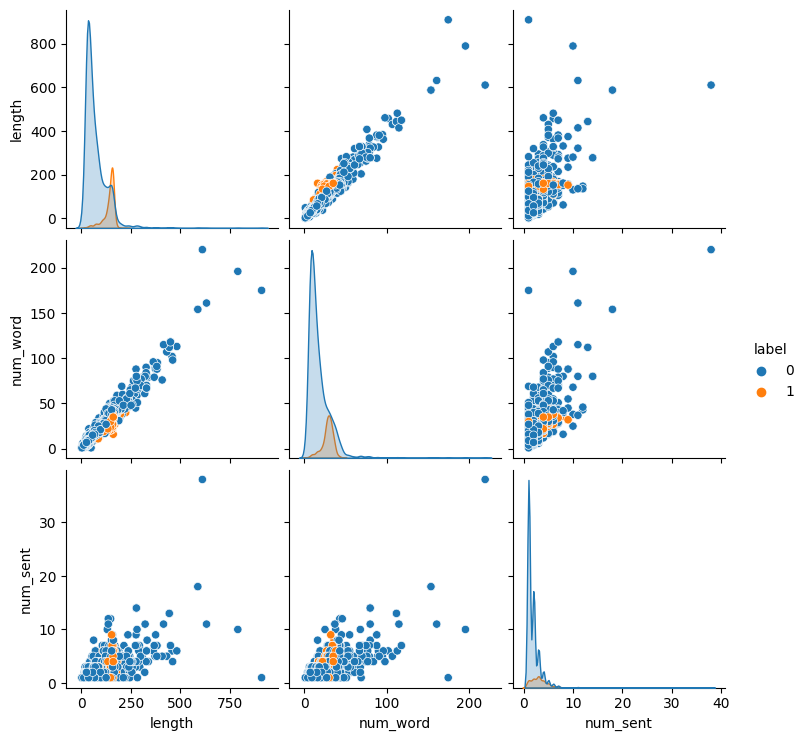

In [19]:
sns.pairplot(df,hue='label')
plt.show()

##Heatmap of correlations


<ipython-input-20-f6412ee67fb3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


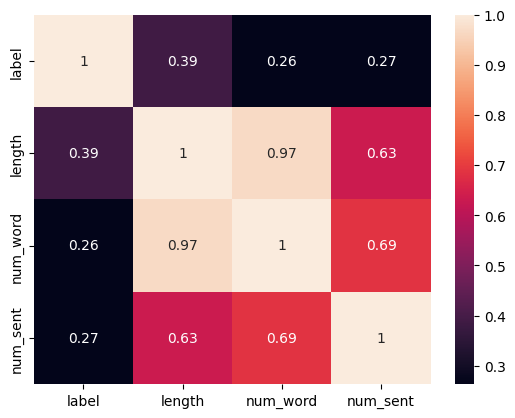

In [20]:
sns.heatmap(df.corr(),annot=True)
plt.show()

we will keep length as it is having highest correlation and also all three added features have same trend

#Data Preprocessing

In [21]:
ps=PS()
def text_transformer(text):
  text=text.lower()
  text=nltk.word_tokenize(text)#makes list
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)#only alpha numeric values to be passed
  text=y;
  y.clear
  y=[]
  #removing stop words
  for i in text:
    if i not in nltk.corpus.stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  text=y;
  y.clear
  y=[]
  ##stemming
  for i in text:
    y.append(ps.stem(i))
  return " ".join(y)

In [22]:
df['txt']=df['txt'].apply(text_transformer)

In [23]:
df.head()

,label,txt,length,num_word,num_sent
0,0,go jurong point crazi avail bugi n great world...,111,24,2
1,0,ok lar joke wif u oni,29,8,2
2,1,free entri 2 wkli comp win fa cup final tkt 21...,155,37,2
3,0,u dun say earli hor u c alreadi say,49,13,1
4,0,nah think goe usf live around though,61,15,1


In [24]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=8,background_color='white')

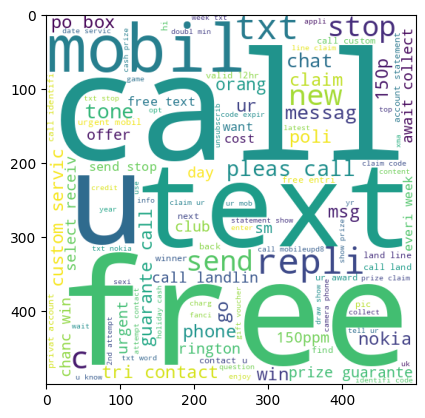

In [25]:
spam_wc=wc.generate(df[df['label']==1]['txt'].str.cat(sep=" "))
plt.imshow(spam_wc)

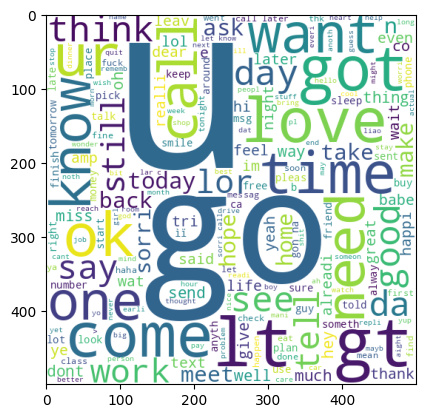

In [26]:
ham_wc=wc.generate(df[df['label']==0]['txt'].str.cat(sep=" "))
plt.imshow(ham_wc)

#Model

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [30]:
X=cv.fit_transform(df['txt']).toarray()

In [31]:
X.shape

(5572, 6708)

In [39]:
y=list(df['label'])
print(len(y))


5572


In [40]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=2)

In [41]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [42]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [43]:
gnb.fit(xtrain,ytrain)
ypred=gnb.predict(xtest)
print(accuracy_score(ytest,ypred))
print(precision_score(ytest,ypred))
print(confusion_matrix(ytest,ypred))

0.873542600896861
0.5346938775510204
[[843 114]
 [ 27 131]]


In [44]:
mnb.fit(xtrain,ytrain)
ypred=mnb.predict(xtest)
print(accuracy_score(ytest,ypred))
print(precision_score(ytest,ypred))
print(confusion_matrix(ytest,ypred))

0.9713004484304932
0.9038461538461539
[[942  15]
 [ 17 141]]


In [45]:
bnb.fit(xtrain,ytrain)
ypred=bnb.predict(xtest)
print(accuracy_score(ytest,ypred))
print(precision_score(ytest,ypred))
print(confusion_matrix(ytest,ypred))

0.9695067264573991
0.9920634920634921
[[956   1]
 [ 33 125]]


In [47]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [50]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, xtrain,ytrain,xtest,ytest)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9291479820627803
Precision -  0.8211382113821138
For  KN
Accuracy -  0.9067264573991032
Precision -  1.0
For  NB
Accuracy -  0.9713004484304932
Precision -  0.9038461538461539
For  DT
Accuracy -  0.905829596412556
Precision -  0.9206349206349206
For  LR
Accuracy -  0.9695067264573991
Precision -  0.984375
For  RF
Accuracy -  0.9605381165919282
Precision -  0.9913793103448276
For  AdaBoost
Accuracy -  0.9560538116591928
Precision -  0.9291338582677166
For  BgC
Accuracy -  0.9650224215246637
Precision -  0.976
For  ETC
Accuracy -  0.967713004484305
Precision -  1.0
For  GBDT
Accuracy -  0.9381165919282511
Precision -  0.9587628865979382
For  xgb
Accuracy -  0.9650224215246637
Precision -  0.983739837398374


In [51]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.906726,1.000000
8,ETC,0.967713,1.000000
5,RF,0.960538,0.991379
4,LR,0.969507,0.984375
10,xgb,0.965022,0.983740
7,BgC,0.965022,0.976000
9,GBDT,0.938117,0.958763
6,AdaBoost,0.956054,0.929134
3,DT,0.905830,0.920635
2,NB,0.971300,0.903846


##appending length of message

In [53]:
X2 = np.hstack((X,df['length'].values.reshape(-1,1)))
X2.shape
xtrain2,xtest2,ytrain2,ytest2=train_test_split(X,y,test_size=0.2,random_state=2)
svc2 = SVC(kernel='sigmoid', gamma=1.0)
knc2 = KNeighborsClassifier()
mnb2 = MultinomialNB()
dtc2 = DecisionTreeClassifier(max_depth=5)
lrc2 = LogisticRegression(solver='liblinear', penalty='l1')
rfc2 = RandomForestClassifier(n_estimators=50, random_state=2)
abc2 = AdaBoostClassifier(n_estimators=50, random_state=2)
bc2 = BaggingClassifier(n_estimators=50, random_state=2)
etc2 = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt2 = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb2 = XGBClassifier(n_estimators=50,random_state=2)

In [54]:
clfs = {
    'SVC' : svc2,
    'KN' : knc2,
    'NB': mnb2,
    'DT': dtc2,
    'LR': lrc2,
    'RF': rfc2,
    'AdaBoost': abc2,
    'BgC': bc2,
    'ETC': etc2,
    'GBDT':gbdt2,
    'xgb':xgb2
}
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, xtrain,ytrain,xtest,ytest)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9291479820627803
Precision -  0.8211382113821138
For  KN
Accuracy -  0.9067264573991032
Precision -  1.0
For  NB
Accuracy -  0.9713004484304932
Precision -  0.9038461538461539
For  DT
Accuracy -  0.905829596412556
Precision -  0.9206349206349206
For  LR
Accuracy -  0.9695067264573991
Precision -  0.984375
For  RF
Accuracy -  0.9605381165919282
Precision -  0.9913793103448276
For  AdaBoost
Accuracy -  0.9560538116591928
Precision -  0.9291338582677166
For  BgC
Accuracy -  0.9650224215246637
Precision -  0.976
For  ETC
Accuracy -  0.967713004484305
Precision -  1.0
For  GBDT
Accuracy -  0.9381165919282511
Precision -  0.9587628865979382
For  xgb
Accuracy -  0.9650224215246637
Precision -  0.983739837398374


In [55]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.906726,1.000000
8,ETC,0.967713,1.000000
5,RF,0.960538,0.991379
4,LR,0.969507,0.984375
10,xgb,0.965022,0.983740
7,BgC,0.965022,0.976000
9,GBDT,0.938117,0.958763
6,AdaBoost,0.956054,0.929134
3,DT,0.905830,0.920635
2,NB,0.971300,0.903846


##Voting classifier

In [56]:
from sklearn.ensemble import VotingClassifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
bnb = BernoulliNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
voting = VotingClassifier(estimators=[('svm', svc), ('nb', bnb), ('et', etc)],voting='soft')
voting.fit(xtrain,ytrain)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', BernoulliNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [57]:
y_pred = voting.predict(xtest)
print("Accuracy",accuracy_score(ytest,y_pred))
print("Precision",precision_score(ytest,y_pred))

Accuracy 0.968609865470852
Precision 1.0


In conclusion we can see that adding that extra feature is not bringing much change
The best classifiers are voting (Bernoullinb,etc,svm) and Random forest